<a href="https://colab.research.google.com/github/Nataliaa1994/data-science/blob/master/seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Churn Modelling**

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://ml-repository-krakers.s3-eu-west-1.amazonaws.com/kaggle+/churn_modelling/Telco-Customer-Churn.csv'
df = pd.read_csv(url)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


object to w tym przypadku obiekt tekstowy

In [0]:
df.TotalCharges.sort_values()

936           
3826          
4380          
753           
5218          
         ...  
6646    997.75
5598     998.1
3686    999.45
3353     999.8
2845     999.9
Name: TotalCharges, Length: 7043, dtype: object

df.TotalCharges.value_counts() - widzimy że mamy drugi element pusty więc propozycja jest posortować tez te wartosci i poniewaz warosci numeryczne sortuje sie w kolejnosci naturalnej i liczbowej to wartosci tekstowe  sa sortowane nieco inaczej . sortowanie nie przebiega jak powinno , widzimy że pierwsze 11 wartości jest pustych i dlatego pandas to odczytal jako object, nie mozemywykonywac operacji dla jakich moglibysmy wykonac dla wartosci numerycznych czyli nie mozemy na przyklad posortowac wiec sprobujmy to zmienic.

Na początek sprobujemy wyfiltrowac te wszystkie dane gdzie rzeczywiscie nie ma tej spacji , mamy techniki ktore mozemy zastepowac na puste dane , wykorzystamy prosta technike .. zastapimy ***puste wyniki mediana tych pozostalych wartosci jest to czesta technika.. czasem mozemy zamiast mediany uzyc srednia ***. ***albo mozna wytrenowac model uczenia maszynowego tych danych!!!***

liczymy mediane czyli musimy wyrzucic te 11 wierszy ktore sa puste , czyli wycinanie
musielismy przekonwertowac na liczbe bo to zmienna tekstowa- object)

df[df.TotalCharges !=' ']['TotalCharges'].astype('float32').median()  - dostalićmy mediane i ta mediane chcemy wstawic tam gdzie puste 

In [0]:
TotalChargesMedian = df[df.TotalCharges !=' ']['TotalCharges'].astype('float32').median()

In [0]:
df['TotalCharges'][df['TotalCharges'] == ' '] = TotalChargesMedian
df['TotalCharges'] = df['TotalCharges'].astype('float32')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
df.TotalCharges.value_counts() 

1397.475098    11
20.200001      11
19.750000       9
19.650000       8
20.049999       8
               ..
1588.750000     1
1451.599976     1
1173.349976     1
5589.450195     1
1024.000000     1
Name: TotalCharges, Length: 6531, dtype: int64

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


jesli nie ma jakis danych to pandas oznacza jako numpynan a sama spacje traktuje jako dana , 
mozemy zobaczyc czy brakuje jakies dane za pomoca isnull().sum()  , te sum nam ulatwi szukanie czy brakuje jakas danajak damy kolejne sum to poda nam lacznie liczbe wszystkich braku wartosci

In [0]:
if not df.isnull().sum().sum():
  print('Nie ma braków')

Nie ma braków


musimy zobaczyc czy chcemy by wszystkie byo jako obiekt a moze jednak category wteyd nam ulatwi zrobienie wykresu


In [0]:
categorical = ['gender','SeniorCitizen','Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
              'InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport',
              'StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod', 'Churn']
numerical = ['tenure','MonthlyCharges','TotalCharges']

for col in categorical:
    df[col]=pd.Categorical(df[col])

for col in numerical:
    df[col]=df[col].astype('float32')
    df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   object  
 1   gender            7043 non-null   category
 2   SeniorCitizen     7043 non-null   category
 3   Partner           7043 non-null   category
 4   Dependents        7043 non-null   category
 5   tenure            7043 non-null   float32 
 6   PhoneService      7043 non-null   category
 7   MultipleLines     7043 non-null   category
 8   InternetService   7043 non-null   category
 9   OnlineSecurity    7043 non-null   category
 10  OnlineBackup      7043 non-null   category
 11  DeviceProtection  7043 non-null   category
 12  TechSupport       7043 non-null   category
 13  StreamingTV       7043 non-null   category
 14  StreamingMovies   7043 non-null   category
 15  Contract          7043 non-null   category
 16  PaperlessBilling  7043 n

usuwamy custokmerid jest jako object

In [0]:
df=df.drop(columns=['customerID'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            7043 non-null   category
 1   SeniorCitizen     7043 non-null   category
 2   Partner           7043 non-null   category
 3   Dependents        7043 non-null   category
 4   tenure            7043 non-null   float32 
 5   PhoneService      7043 non-null   category
 6   MultipleLines     7043 non-null   category
 7   InternetService   7043 non-null   category
 8   OnlineSecurity    7043 non-null   category
 9   OnlineBackup      7043 non-null   category
 10  DeviceProtection  7043 non-null   category
 11  TechSupport       7043 non-null   category
 12  StreamingTV       7043 non-null   category
 13  StreamingMovies   7043 non-null   category
 14  Contract          7043 non-null   category
 15  PaperlessBilling  7043 non-null   category
 16  PaymentMethod     7043 n

wyswietlamy podstawowe statystyki ramki danych za pomoca describe()

In [0]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371147,64.761826,2281.915039
std,24.559708,30.089973,2265.270752
min,0.000000,18.250000,18.799999
25%,9.000000,35.500000,402.225006
50%,29.000000,70.349998,1397.475098
75%,55.000000,89.849998,3786.599976
max,72.000000,118.750000,8684.799805


wysiwetlamy na temat atrybutow kategorialnych

In [0]:
df.describe(include=['category'])

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3555,5901,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


***ROZKŁAD CHURN***

No     5174
Yes    1869
Name: Churn, dtype: int64


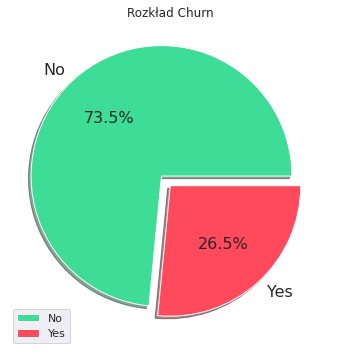

In [0]:
plt.figure(figsize=(8,6))
sns.set()
df.Churn.value_counts().plot(kind='pie',
                             fontsize =16,
                             colors=['#3DDC97', '#FF495C'],
                             explode=[0.1, 0],
                             shadow=True,
                             autopct='%1.1f%%')
plt.legend()
plt.ylabel('')
plt.title('Rozkład Churn')
print(df.Churn.value_counts())

No     5174
Yes    1869
Name: Churn, dtype: int64


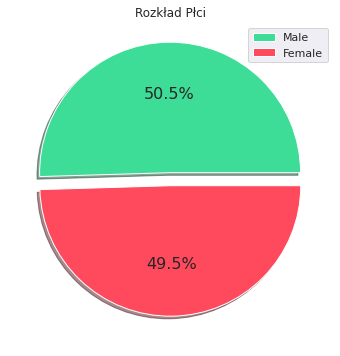

In [0]:
plt.figure(figsize=(8,6))
sns.set()
df.gender.value_counts().plot(kind='pie',
                             fontsize =16,
                            labels=['',''],
                             colors=['#3DDC97', '#FF495C'],
                             explode=[0.1, 0],
                             shadow=True,
                             autopct='%1.1f%%')
plt.legend(['Male','Female'])
plt.ylabel('')
plt.title('Rozkład Płci')
print(df.Churn.value_counts())

No     5174
Yes    1869
Name: Churn, dtype: int64


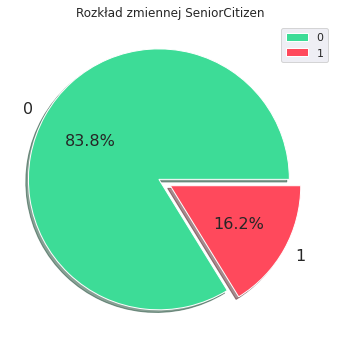

In [0]:
plt.figure(figsize=(8,6))
sns.set()
df.SeniorCitizen.value_counts().plot(kind='pie',
                             fontsize =16,
                             colors=['#3DDC97', '#FF495C'],
                             explode=[0.1, 0],
                             shadow=True,
                             autopct='%1.1f%%')
plt.legend()
plt.ylabel('')
plt.title('Rozkład zmiennej SeniorCitizen')
print(df.Churn.value_counts())

***Rozkłady***

za pomoca distplot wezmiemy miesieczne wydatki , bins to liczba slupkow,  za pomoca sharey to podzielimy na dwa wykresy 
ax to lista zawierajaca nasze osie, ustawiamy ax=ax[indeks osi]
1.   List item
2.   List item



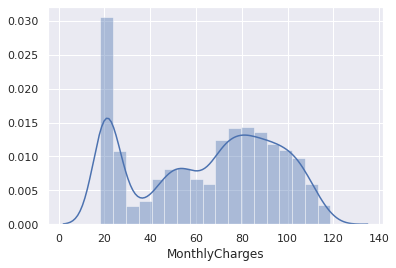

In [0]:
sns.distplot(df.MonthlyCharges, bins=30)

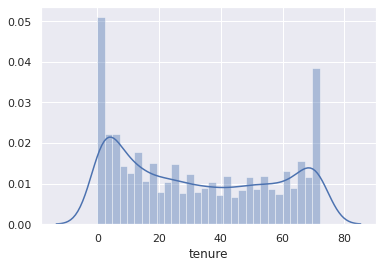

In [0]:
sns.distplot(df.tenure, bins=30)

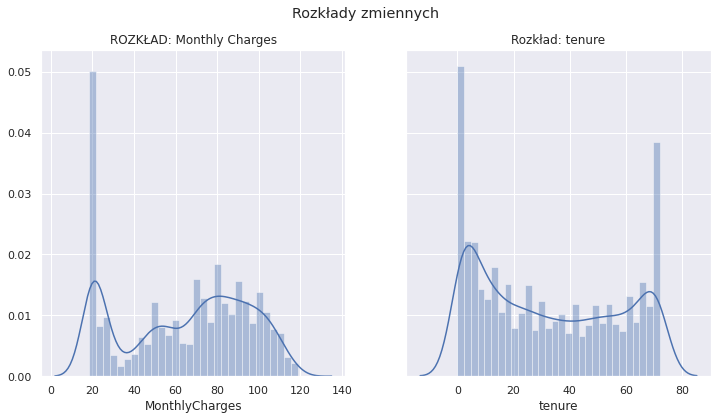

In [0]:
fig,ax=plt.subplots(nrows=1, ncols=2, sharey=True, figsize =(12,6))
sns.distplot(df.MonthlyCharges, bins=30, ax=ax[0])
sns.distplot(df.tenure, bins=30, ax=ax[1])
fig.suptitle('Rozkłady zmiennych')
ax[0].title.set_text('ROZKŁAD: Monthly Charges')
ax[1].title.set_text('Rozkład: tenure')

macierz rozrzutu zmiennych

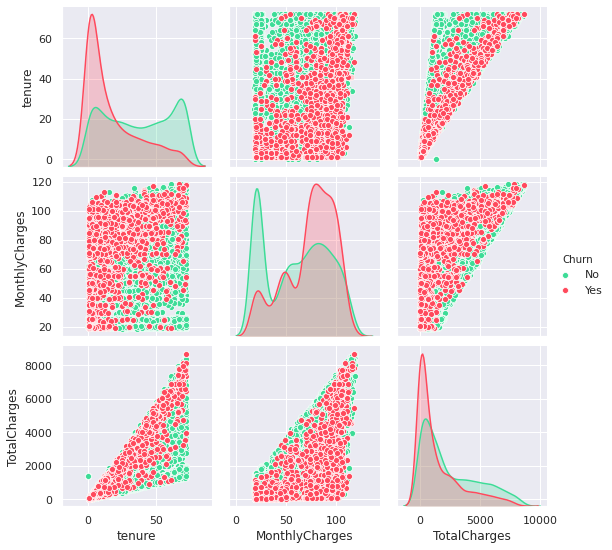

In [0]:
sns.pairplot(data=df, vars=['tenure', 'MonthlyCharges','TotalCharges'], 
             hue='Churn', palette=['#3DDC97', '#FF495C'])

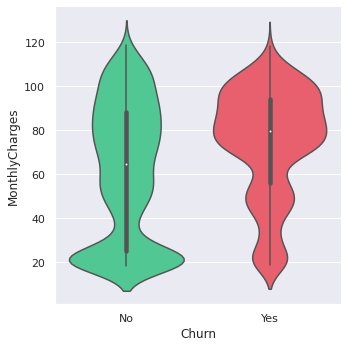

In [0]:
sns.catplot(data=df, x='Churn', y='MonthlyCharges',
            kind='violin', palette=['#3DDC97', '#FF495C'])

***Macierz korelacji***

In [0]:
df.corr()

,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.247900,0.825464
MonthlyCharges,0.247900,1.000000,0.650864
TotalCharges,0.825464,0.650864,1.000000


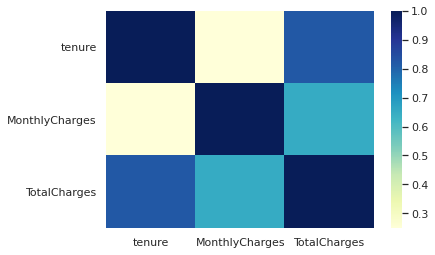

In [0]:
sns.heatmap(df.corr(),cmap="YlGnBu")